In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup as bs
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
alamat = 'https://pokemondb.net/pokedex/all'
req = Request(alamat, headers={'User-Agent' : 'Mozilla/5.0'})
html = urlopen(req)
data = bs(html, 'html.parser')

In [4]:
table = data.find('table', {'id' : 'pokedex'})

In [5]:
rows = table.findAll('tr', limit=985)

In [6]:
pokes = []
for row in rows:
    poke_datas = []
    for data in row.findAll(['th','td']):
        poke_data = data.get_text()
        poke_datas.append(poke_data)
    pokes.append(poke_datas)

In [7]:
df_pokes = pd.DataFrame(pokes)

In [8]:
df_pokes_head = df_pokes.iloc[0]

In [9]:
df_pokes.columns = df_pokes_head
df_pokes = df_pokes[1:]
df_pokes.reset_index(drop=True)

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,003,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,004,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
979,847,Barraskewda,Water,490,61,123,60,60,50,136
980,848,Toxel,Electric Poison,242,40,38,35,54,35,40
981,849,Toxtricity Low Key Form,Electric Poison,502,75,98,70,114,70,75
982,849,Toxtricity Amped Form,Electric Poison,502,75,98,70,114,70,75


In [23]:
df_pokes = df_pokes.astype({'Attack': int, 'Defense': int})

In [24]:
df_pokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 1 to 984
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   #        984 non-null    object
 1   Name     984 non-null    object
 2   Type     984 non-null    object
 3   Total    984 non-null    object
 4   HP       984 non-null    object
 5   Attack   984 non-null    int32 
 6   Defense  984 non-null    int32 
 7   Sp. Atk  984 non-null    object
 8   Sp. Def  984 non-null    object
 9   Speed    984 non-null    object
dtypes: int32(2), object(8)
memory usage: 69.3+ KB


In [27]:
df_pokes.loc[df_pokes['Defense'] == 5]

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
148,113,Chansey,Normal,450,250,5,5,35,105,50
523,440,Happiny,Normal,220,100,5,5,15,65,30


In [28]:
x = df_pokes['Attack']
y = df_pokes['Defense']

In [29]:
x.min()

5

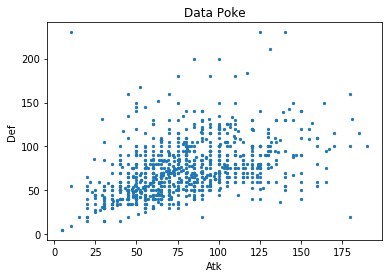

In [37]:
plt.scatter(x, y, s=5)
plt.title("Data Poke")
plt.xlabel("Atk")
plt.ylabel("Def")
plt.show()

In [34]:
X = df_pokes[['Attack', 'Defense']]

In [39]:
km = KMeans(n_clusters=3, random_state=0)
cluster = km.fit_predict(X)

In [42]:
df_pokes['Cluster'] = cluster

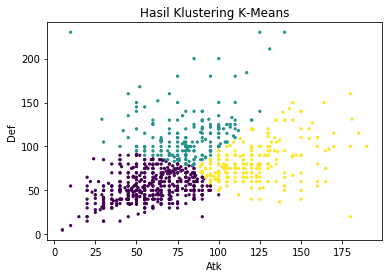

In [46]:
plt.scatter(x, y, c=df_pokes['Cluster'], s=5)
plt.title("Hasil Klustering K-Means")
plt.xlabel("Atk")
plt.ylabel("Def")
plt.show()